In [103]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pylab
from PIL import Image, ImageEnhance
%matplotlib inline

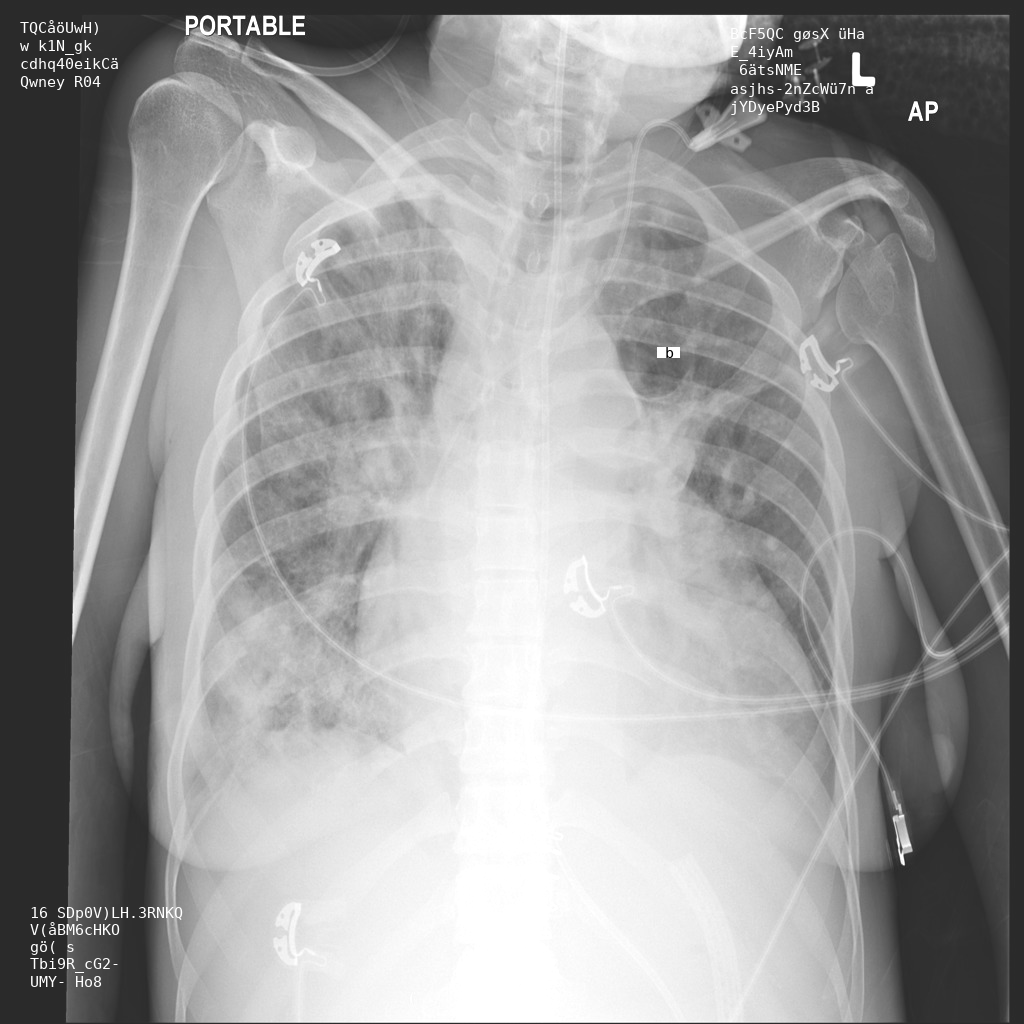

In [2]:
Image.open('test_data_malik/with_text/00000001.png')

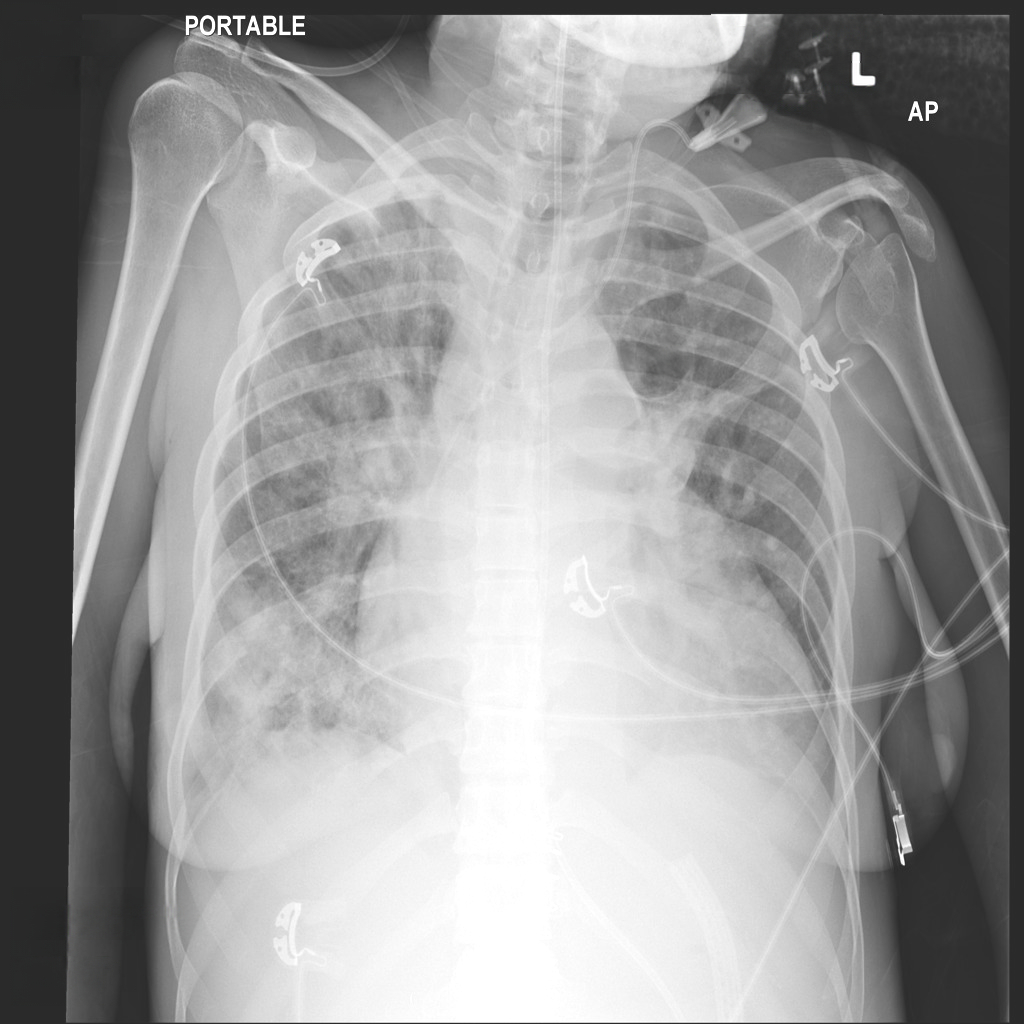

In [120]:
Image.open('selfattent/final/00000001.png')

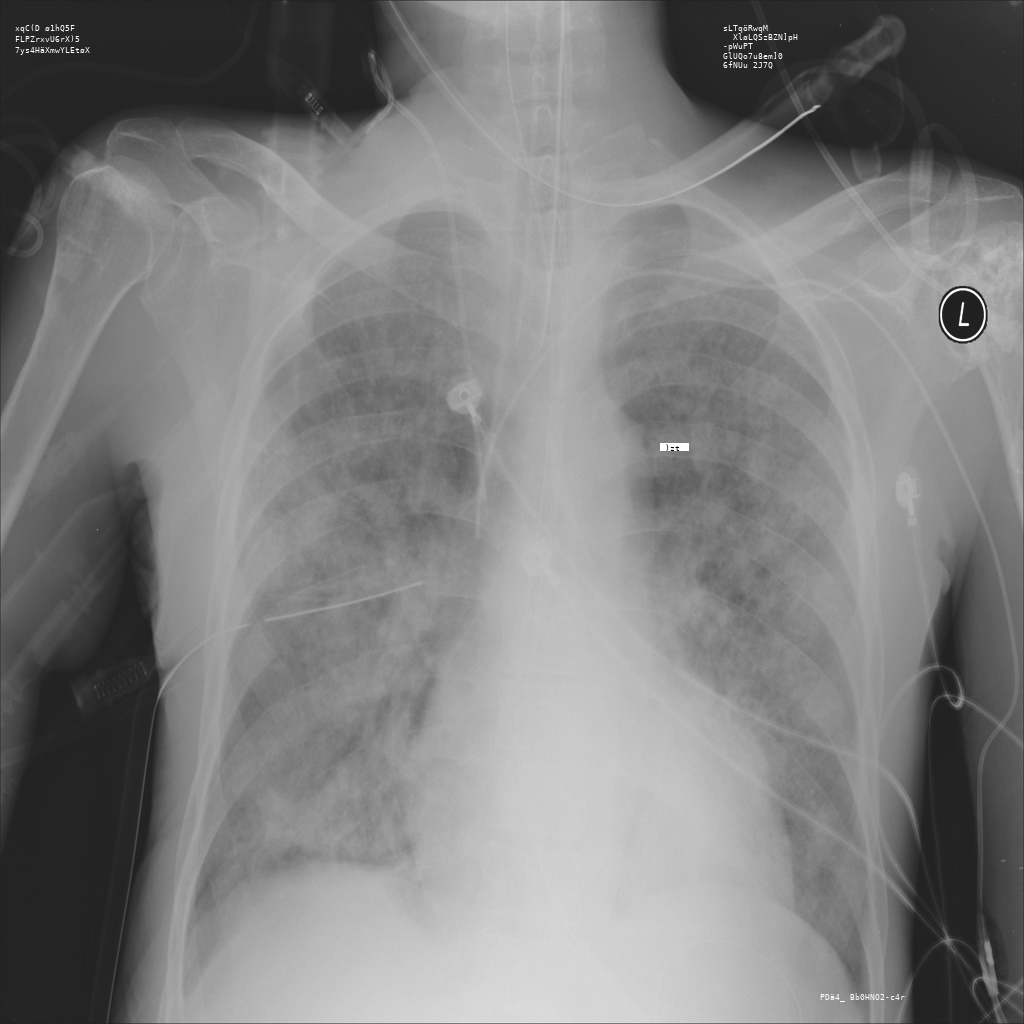

In [59]:
Image.open('data_malik/with_text/00000026.png')

In [2]:
def print_diff_picture(img1,img2,a,b):
    img3 = cv.absdiff(img2,img1)
    alpha=a
    beta=b

    img3=cv.addWeighted(img3,alpha,np.zeros(img3.shape, img3.dtype),0,beta)


    plt.figure(figsize = (10,10))
    plt.imshow(img3, vmin=0, vmax=0.1)
    

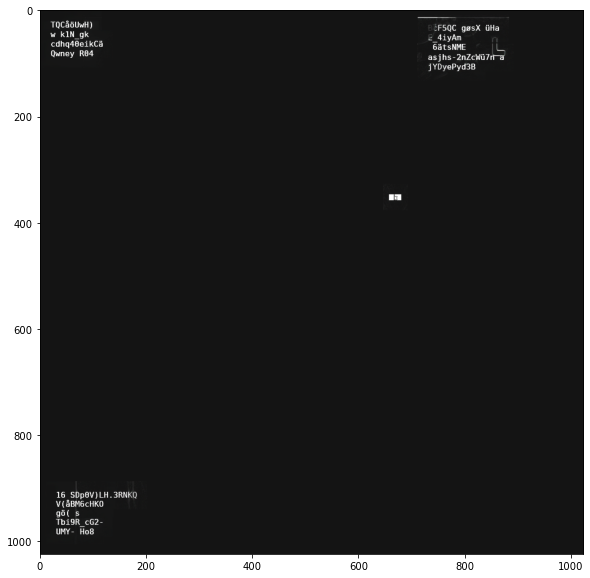

In [69]:
img1 = cv.imread('test_data_malik/with_text/00000001.png')
img2 = cv.imread('final/00000001.png')
alpha = 2
beta = 20
diff = print_diff_picture(img1,img2, alpha, beta)

In [7]:
img1 = Image.open('test_data_malik/with_text/00000011.png')
img2 = Image.open('final/00000011.png')

equ = cv.absdiff(img1, img2)
"""
STEP 1: Normalized cumulative histogram
"""
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)
#normalize
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array/num_pixels
#cumulative histogram
chistogram_array = np.cumsum(histogram_array)
"""
STEP 2: Pixel mapping lookup table
"""
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)
"""
STEP 3: Transformation
"""
# flatten image array into 1D list
img_list = list(img_array.flatten())
# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]
# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)

In [70]:
img1 = cv.imread('test_data_malik/with_text/00000001.png')
img2 = cv.imread('final/0000001.png')

equ = cv.absdiff(img1, img2)


error: OpenCV(3.4.2) /tmp/build/80754af9/opencv-suite_1535558553474/work/modules/core/src/arithm.cpp:656: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


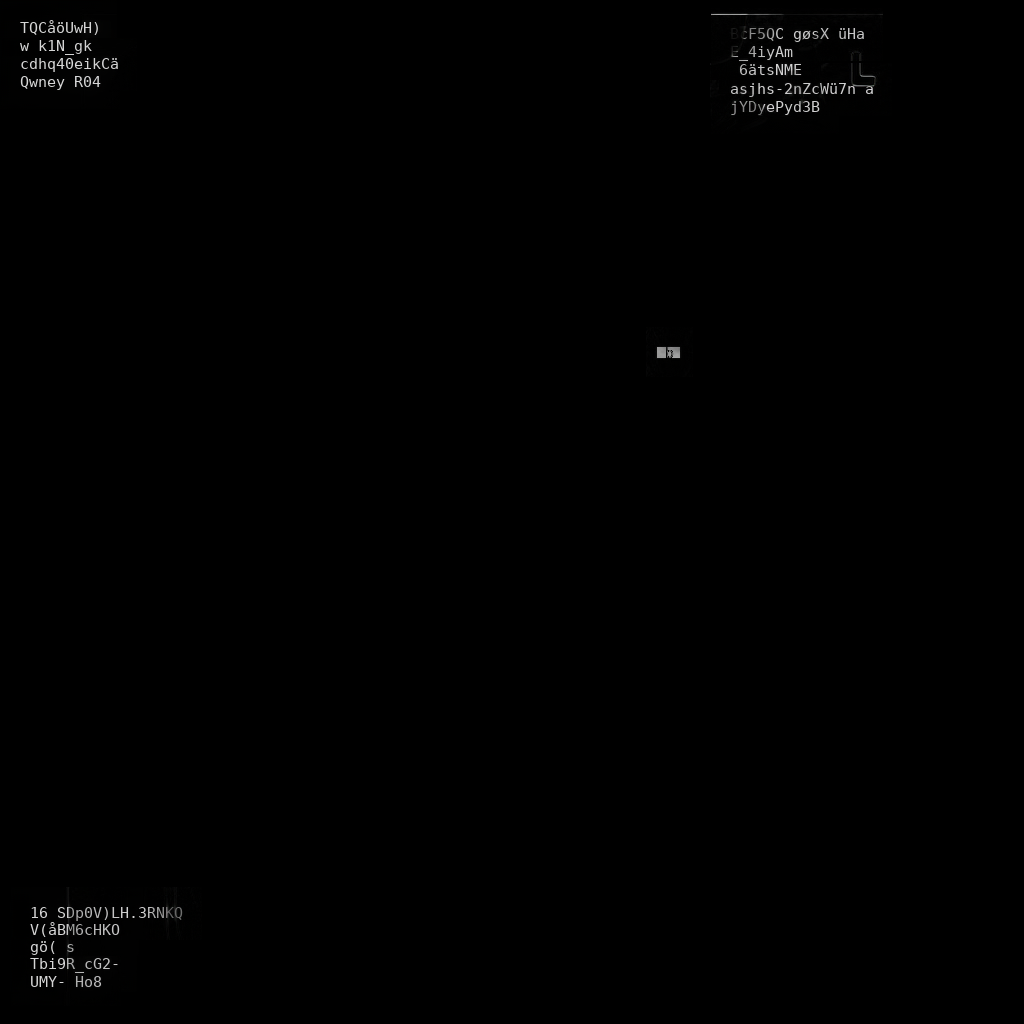

In [72]:
from PIL import ImageChops
img1 = Image.open('test_data_malik/without_text/00000001.png')

diff = ImageChops.difference(img2, img1)
diff

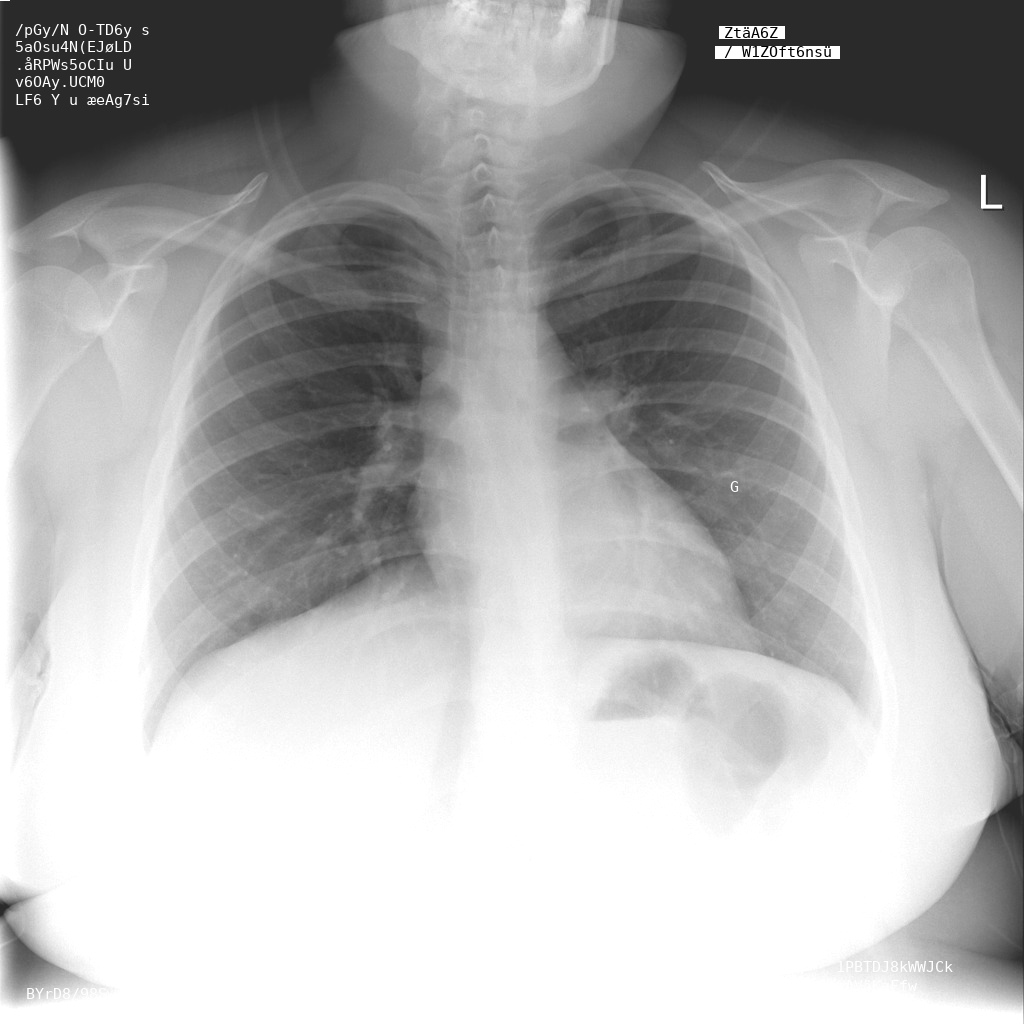

In [61]:
Image.open('test_data_malik/with_text/00000011.png')

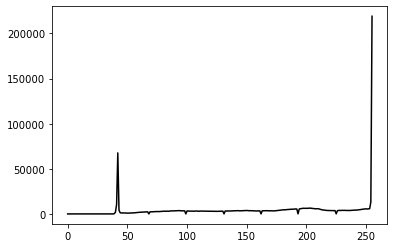

In [50]:

src = cv.imread('final/00000011.png')

src = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

histogram = cv.calcHist([src], [0], None, [256], [0, 256])

dst = cv.equalizeHist(src)



plt.plot(histogram, color='k')
plt.show()

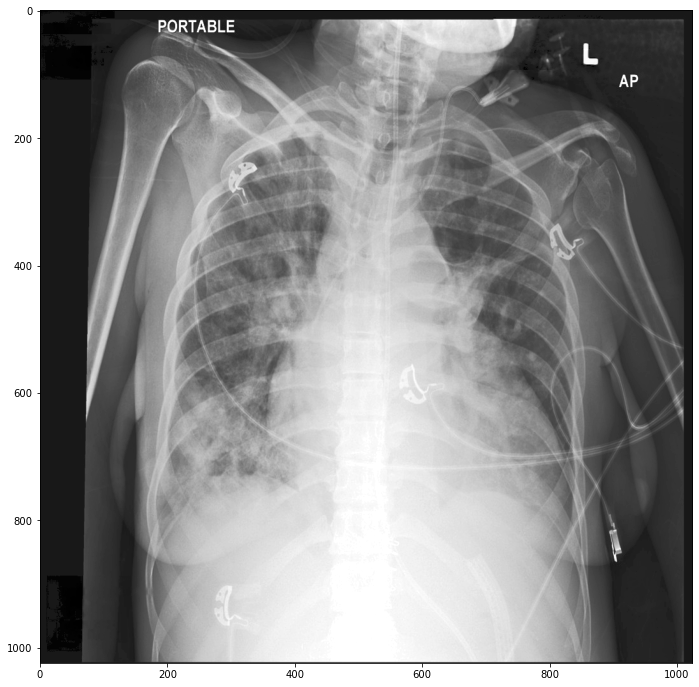

In [6]:
src = cv.imread('final/00000001.png')

src = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

dst = cv.equalizeHist(src)
plt.figure(figsize = (12,12))
plt.imshow(dst, cmap='gray')


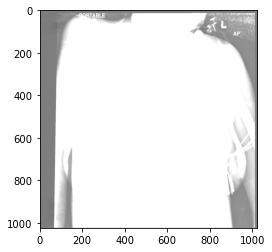

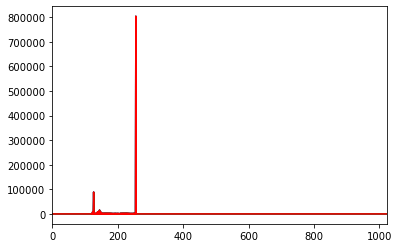

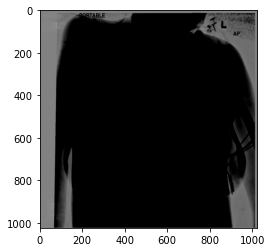

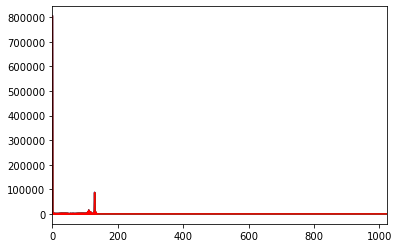

In [28]:
import cv2
import matplotlib.pyplot as plt
  
  
# Read an image
img_bgr = cv2.imread('ouf.png', 1)
plt.imshow(img_bgr)
plt.show()
  
# Histogram plotting of the image
color = ('b', 'g', 'r')
  
for i, col in enumerate(color):
      
    histr = cv2.calcHist([img_bgr], 
                         [i], None,
                         [1024], 
                         [0, 1024])
      
    plt.plot(histr, color = col)
      
    # Limit X - axis to 256
    plt.xlim([0, 1024])
      
plt.show()
  
# get height and width of the image
height, width, _ = img_bgr.shape
  
for i in range(0, height - 1):
    for j in range(0, width - 1):
          
        # Get the pixel value
        pixel = img_bgr[i, j]
          
        # Negate each channel by 
        # subtracting it from 255
          
        # 1st index contains red pixel
        pixel[0] = 255 - pixel[0]
          
        # 2nd index contains green pixel
        pixel[1] = 255 - pixel[1]
          
        # 3rd index contains blue pixel
        pixel[2] = 255 - pixel[2]
          
        # Store new values in the pixel
        img_bgr[i, j] = pixel
  
# Display the negative transformed image
plt.imshow(img_bgr)
plt.show()
  
# Histogram plotting of the
# negative transformed image
color = ('b', 'g', 'r')
  
for i, col in enumerate(color):
      
    histr = cv2.calcHist([img_bgr], 
                         [i], None,
                         [1024],
                         [0, 1024])
      
    plt.plot(histr, color = col)
    plt.xlim([0, 1024])
      
plt.show()

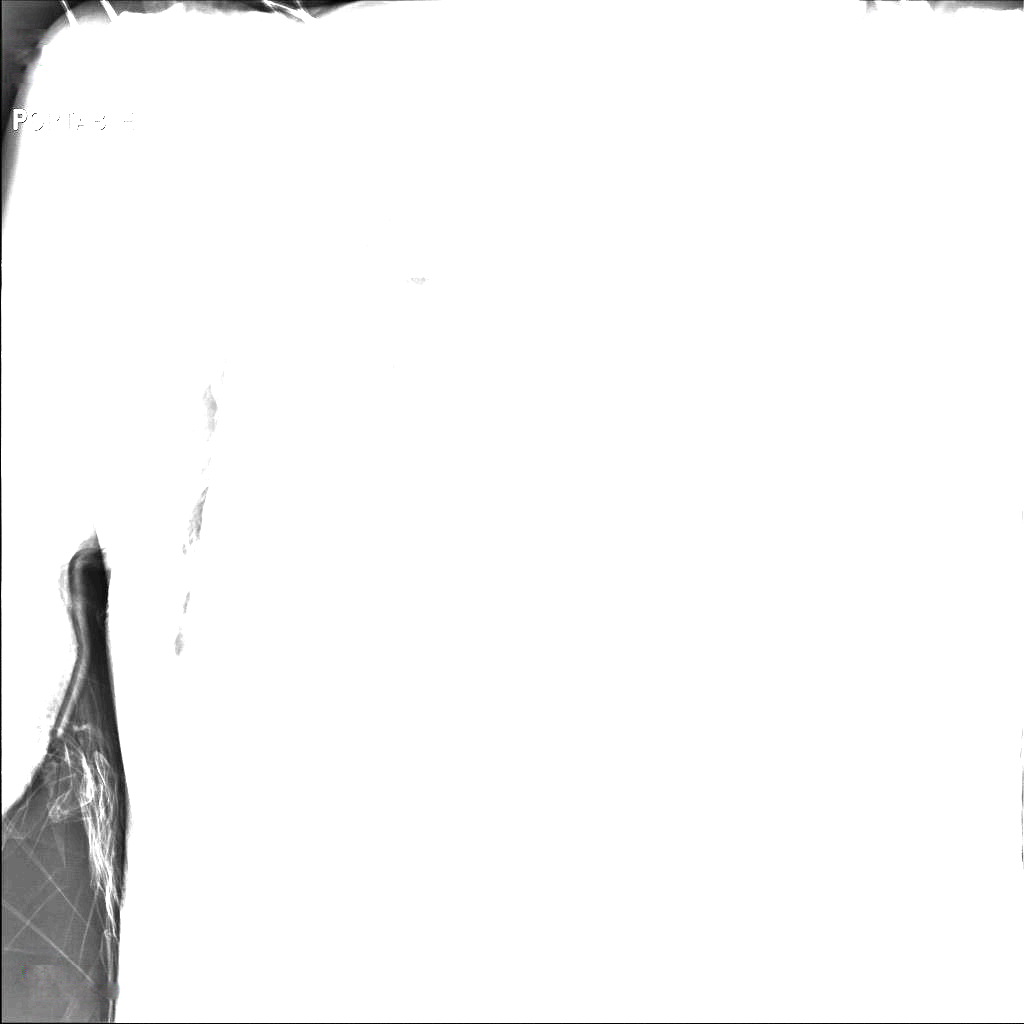

In [167]:
img = Image.open('selfattent/final/00000005.png')
img
factor = 3
enhancer = ImageEnhance.Brightness(img)
out = enhancer.enhance(factor)
factor = 2
enhancer = ImageEnhance.Contrast(out)
out = enhancer.enhance(factor)
out

In [180]:
def minfits(tl):
    left, top = (0,0)
    if((tl[0] -20) >= 0):
        left = tl[0] -20
    if((tl[1] -20) >= 0):
        top = tl[1] -20
    return left, top

def maxfits(br):
    right, bottom = (1024,1024)
    if((br[0] +20) <= 1024):
        right = br[0] +20
    if((br[1] +20) <= 1024):
        bottom = br[1] +20
    return right, bottom

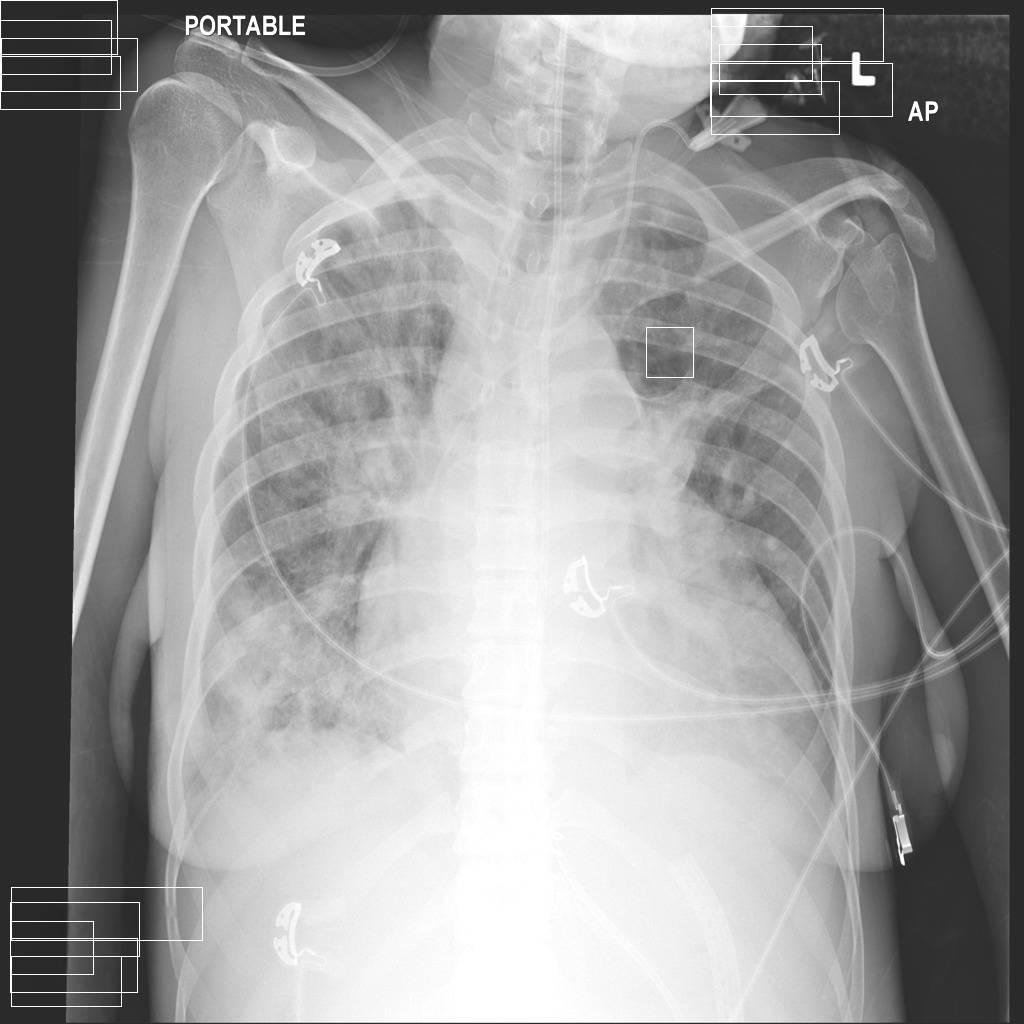

In [206]:
from PIL import ImageDraw
import pandas as pd

im1 = Image.open('selfattent/final/00000001.png')


df = pd.read_csv('test_data_malik/boundingBoxes.csv')
df = df.loc[df['filename'] == "00000001.png"]
df.head()
draw = ImageDraw.Draw(im1)
for index, row in df.iterrows():
    left, top = minfits((row.xmin, row.ymin))
    right, bottom = maxfits((row.xmax, row.ymax))
    draw.rectangle((left, top, right, bottom), fill=None)
im1

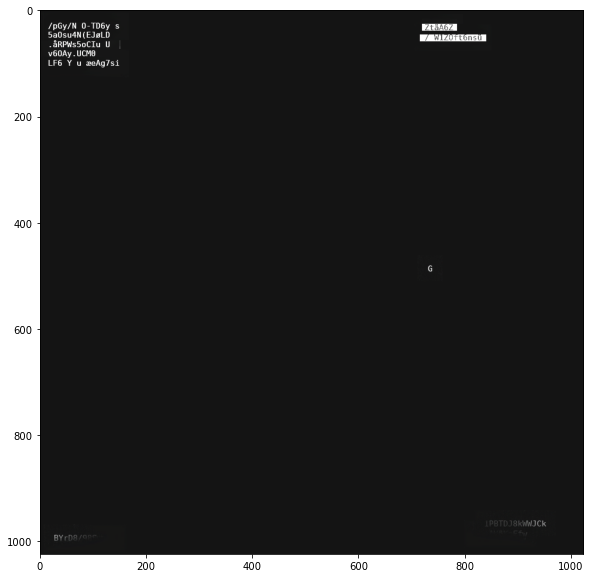

In [14]:
img1 = cv.imread('test_data_malik/with_text/00000011.png')
img2 = cv.imread('final/00000011.png')
print_diff_picture(img1,img2,alpha,beta)

In [1]:
img1 = Image.open('test_data_malik/with_text/00000011.png')
img2 = Image.open('final/00000011.png')
dif = np.fabs(np.subtract(img2[:], img1[:]))
#Show image
imgplot = plt.imshow(dif)
# Choose a color palette
imgplot.set_cmap('jet')
plt.axis('off')
pylab.show()

NameError: name 'np' is not defined

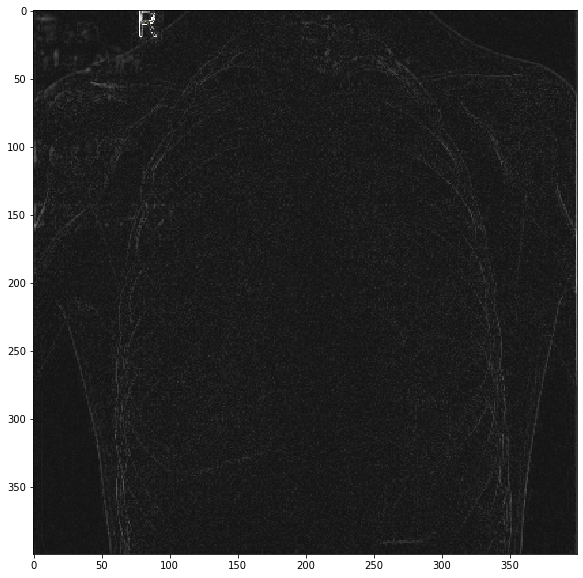

In [19]:
print_diff_picture(img1,img2,alpha,beta)

In [22]:
img1 = cv.imread('data/chest_xray/images/IM-0001-0001.jpeg')
img2 = cv.imread('data/chest_xray/gan_pred_reverse/IM-0001-0001.jpeg')
img1 = cv.resize(img1,(400,400))
#img2 = cv.resize(img2, (1024, 1024))

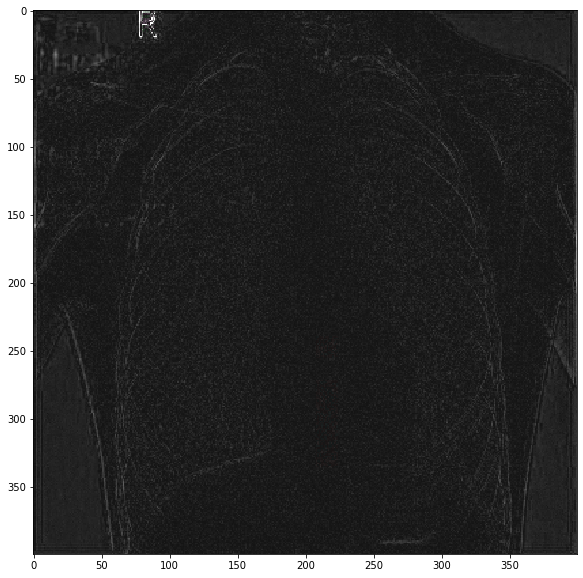

In [23]:
print_diff_picture(img1,img2,alpha,beta)